In [1]:
#Installing the required packages
#!pip install spellchecker
#!pip install pyspellchecker
#!pip install tensorflow
#!pip install keras
#!pip install pydot
#!pip install graphviz
#!pip install pandoc

  Using cached pandoc-2.3-py3-none-any.whl
  Using cached plumbum-1.8.2-py3-none-any.whl (127 kB)
  Using cached ply-3.11-py2.py3-none-any.whl (49 kB)


You should consider upgrading via the 'C:\Users\ritur\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
# 1. Perform necessary data preprocessing, e.g. removing punctuation and stop words, stemming, legitimating. 
# You may use the outputs from previous weekly assignments.
# Cleaning the input data file

#removing all tags from the input file
import re
#using nltk
import nltk
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
import pickle
from nltk.corpus import stopwords
nltk_stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from collections import defaultdict
import re
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker

# Read the input text file
with open('E:\\MS_Course_Notes\\COMP_293C\\Assignments\\Assignment_7\\Full_Cleaned_input.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Define regular expressions to match the JavaScript functions to remove
functions_to_remove = [
    r'Search{"path":.*?\}Skip to main',  # Match and remove JavaScript variables
    r'{"path":.*?\}Skip to main',  # Match and remove JavaScript variables
    r'function focusIt\(\) \{[\s\S]*?\}\);Skip to main',
    r'function focusIt\(\) \{[\s\S]*? \}\);',
    r'\$\(.*?\}\);',
    r'window\.dataLayer = window\.dataLayer \|\| \[\];\s*function gtag\(\)\{dataLayer\.push\(arguments\);\}\s*gtag\(\'js\', new Date\(\)\);\s*gtag\(\'config\', \'UA-41988811-1\', \{[^}]+\}\);'

]

# Remove the matched functions
for pattern in functions_to_remove:
    text = re.sub(pattern, '', text, flags=re.DOTALL)

tokens_text = word_tokenize(text)

#print(tokens_text)

# Remove non-alphanumeric items, empty strings, and whitespace strings
filtered_list = [item for item in tokens_text if re.match(r'^[a-zA-Z0-9]*$', item) is not None]

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_list = [word for word in filtered_list if word not in stop_words]
filtered_list = [word.lower() for word in filtered_list]

# Print the filtered list without stopwords
#print(filtered_list)

lemmatizer = WordNetLemmatizer()

# Perform lemmatization
lemmatized_list = [lemmatizer.lemmatize(word) for word in filtered_list]

# Print the stemmed and lemmatized list
#print(lemmatized_list)


#1. Cleaning the input file without punctuation and stop words in the data files. 

# Specify the path for the output file to save the tokenized text
output_file_path = "E:\\MS_Course_Notes\\COMP_293C\\Assignments\\Assignment_7\\q1_cleaned_output.txt"

# Write the tokenized text to the output file
with open(output_file_path, 'w') as output_file:
    output_file.write(str(lemmatized_list))

print("Remove punctuation and stop words in the data files text written to:", output_file_path)

Remove punctuation and stop words in the data files text written to: E:\MS_Course_Notes\COMP_293C\Assignments\Assignment_7\q1_cleaned_output.txt


## Binary Classification Problem: Identifying Programs and general University data

## Classification is based on the Programs
As project is a university chatbot I am trying to create a binary classification model to determine whether the text refers to a program related data or general university data. The data set has the general data like pacific card, housing, dinning and course related information. So here I spliting the academic related data and non academic data in separate labels.

## Dataset
The a dataset that contains various paragraphs related to educational programs and general FAQ in the university. Each paragraph is associated with a label indicating whether it's about a "non academic" (Class 0) or an "academic" (Class 1).

## Columns Used
1. **Text Data (Paragraphs):** We use the text data column containing the paragraphs that describe different educational programs. This text data is essential for extracting information to make classification decisions.

2. **Target Label (Class):** We have a target label column (Class) to identify whether each paragraph corresponds to a "academic" or an "non academic."

### Explanation
After calculating the frequency of academic keywords and non acdemic keywords so I am proceeding with those words. So that the dataset is balanced.

In [3]:
#calculating with the frequency of the words to proceed with the binary classification

import re
import nltk
from nltk.corpus import stopwords
from collections import Counter


# Tokenize the text into words
words = nltk.word_tokenize(text)

# Convert words to lowercase
words = [word.lower() for word in words]

# Remove stopwords and punctuation
stop_words = set(stopwords.words("english"))
words = [word for word in lemmatized_list if word.isalpha() and word not in stop_words]

# Count word frequencies
word_counts = Counter(words)

# Find the most common words
most_common_words = word_counts.most_common(10)  # Change the number as needed

# Print the most common words
for word, count in most_common_words:
    print(f"{word}: {count}")


student: 1766
program: 1159
pacific: 765
school: 577
application: 531
university: 519
scholarship: 498
course: 419
graduate: 372
law: 337


In [4]:
# Read the input text file
with open('E:\\MS_Course_Notes\\COMP_293C\\Assignments\\Assignment_7\\Full_Cleaned_input.txt', 'r', encoding='utf-8') as file:
    text = file.read()
    
input_text = text

# Add spaces after question marks and appropriate punctuation at the end of each line
formatted_text = re.sub(r'(\w)\?(\w)', r'\1? \2', input_text)
formatted_text = re.sub(r'(\w)\.', r'\1. ', formatted_text)

# Print the updated input data
#print(formatted_text)

In [5]:
#creating a new column for the binary classification
import re

# Define the keywords related to academic
keywords = ['graduate','undergraduate','program','degree','academic',
            'student','application','international','scholarship','eligible',
            'admission','financial','aid','research','course','school',
            'Bachelor','master','academic','semester','eligibility','science'
           'education','prerequisite','gpa','research','score','fee']

# Define a function to check if any of the keywords are in a paragraph
def contains_keyword(paragraph):
    for keyword in keywords:
        if re.search(keyword, paragraph, re.IGNORECASE):
            return 1  # Label as 1 if a keyword is found
    return 0  # Return None for paragraphs without either keyword

# Split the text data into paragraphs (assuming paragraphs are separated by a period followed by a space)
paragraphs = re.split(r'(?<=[.!?])\s+', formatted_text)

# Create a list of (label, paragraph) pairs, excluding None values
labeled_paragraphs = [(label, paragraph) for label, paragraph in [(contains_keyword(paragraph), paragraph) for paragraph in paragraphs] if label is not None]

#print(labeled_paragraphs)

# Initialize counters for labels
count_0 = 0
count_1 = 0

# Iterate through the labeled paragraphs to count the labels
#showing the datatset with is almost balanced
for label, _ in labeled_paragraphs:
    if label == 0:
        count_0 += 1
    elif label == 1:
        count_1 += 1

# Print the counts
print("Count of label 0:", count_0)
print("Count of label 1:", count_1)


Count of label 0: 4362
Count of label 1: 4495


In [6]:
# Write the labeled data to a new file
with open("E:\\MS_Course_Notes\\COMP_293C\\Assignments\\Assignment_7\\labeled_data.txt", "w") as file:
    for label, paragraph in labeled_paragraphs:
        file.write(f"{label}\t{paragraph}\n")

In [7]:
# Splitting the data set into test and train dataset
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and labels (y)
X = [paragraph for label, paragraph in labeled_paragraphs]
y = [label for label, paragraph in labeled_paragraphs]

# Split the dataset into training and test sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# min_df is the minimum proportion of documents that contain the word (excludes words that are rarer than this proportion)
# max_df is the maximum proportion of documents that contain the word (excludes words that
# are rarer than this proportion
# max_features is the maximum number of words that will be considered
# the documents will be lower cased
vectorizer = CountVectorizer(min_df = 1, max_df = 1.0, max_features = 1000, lowercase = True)
vectorizer.fit(X_train)
vectorizer.fit(X_test)

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [9]:
#2. For the binary classification problem, setting up an MLP to solve it.
from keras.models import Sequential
from keras import layers
from keras import models

# Number of features (words)
# This is based on the data and the parameters that were provided to the vectorizer
# min_df, max_df and max_features
input_dimension = X_train.shape[1]  
print(input_dimension)

1000


In [10]:
# Define the model by improving the parameters
# Try to improve performance by modifying hyperparameters.
# a Sequential model is a stack of layers where each layer has one input and one output
# tensor
# Since this is a binary classification problem, there will be one output (0 or 1) 
# depending on whether the data is academic or non-academic
# so Sequential is appropriate
model = Sequential()
model.add(layers.Dense(16, input_dim = input_dimension, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
# output layer
model.add(layers.Dense(1, activation = 'sigmoid'))

In [11]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])
# summarize the model to make sure that it's structured as intended
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                16016     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16849 (65.82 KB)
Trainable params: 16849 (65.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
import numpy as np

# Ensure the shape of X_train matches the model's input shape
assert X_train.shape[1] == 1000, "X_train shape doesn't match the model's input shape"

# Convert list of integers to NumPy array (if needed)
y_train = np.array(y_train)
y_test = np.array(y_test)  # If y_test is a list of integers

# Now, try fitting your model again
history = model.fit(X_train, y_train,
                    epochs=30,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)


Epoch 1/30
709/709 [==============================] - 2s 2ms/step - loss: 0.3122 - accuracy: 0.8713 - val_loss: 0.1241 - val_accuracy: 0.9633
Epoch 2/30
709/709 [==============================] - 1s 2ms/step - loss: 0.0914 - accuracy: 0.9726 - val_loss: 0.1139 - val_accuracy: 0.9673
Epoch 3/30
709/709 [==============================] - 1s 2ms/step - loss: 0.0600 - accuracy: 0.9824 - val_loss: 0.1222 - val_accuracy: 0.9644
Epoch 4/30
709/709 [==============================] - 1s 2ms/step - loss: 0.0464 - accuracy: 0.9859 - val_loss: 0.1434 - val_accuracy: 0.9622
Epoch 5/30
709/709 [==============================] - 2s 2ms/step - loss: 0.0349 - accuracy: 0.9900 - val_loss: 0.1667 - val_accuracy: 0.9639
Epoch 6/30
709/709 [==============================] - 1s 2ms/step - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.1917 - val_accuracy: 0.9594
Epoch 7/30
709/709 [==============================] - 1s 2ms/step - loss: 0.0219 - accuracy: 0.9935 - val_loss: 0.2064 - val_accuracy: 0.9599
Epoch 

In [13]:
from keras.backend import clear_session
# clear states generated by Keras to reduce memory usage
clear_session()

In [14]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9969
Testing Accuracy:  0.9486


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                16016     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16849 (65.82 KB)
Trainable params: 16849 (65.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


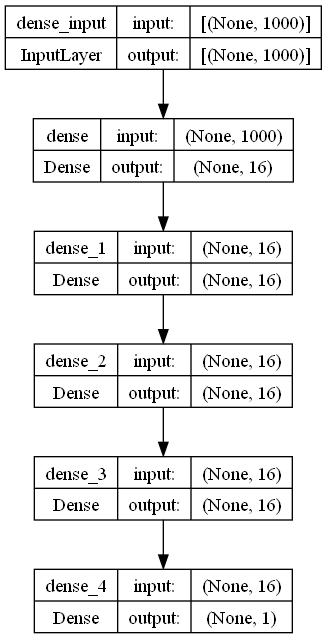

In [15]:
print(model.summary())
from keras.utils import plot_model
#visualize the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [16]:
#%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label = 'Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(fontsize = 14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #plt.savefig('acc.svg')
    #plt.show()
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(fontsize = 14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig('loss.svg')
    plt.show()
   

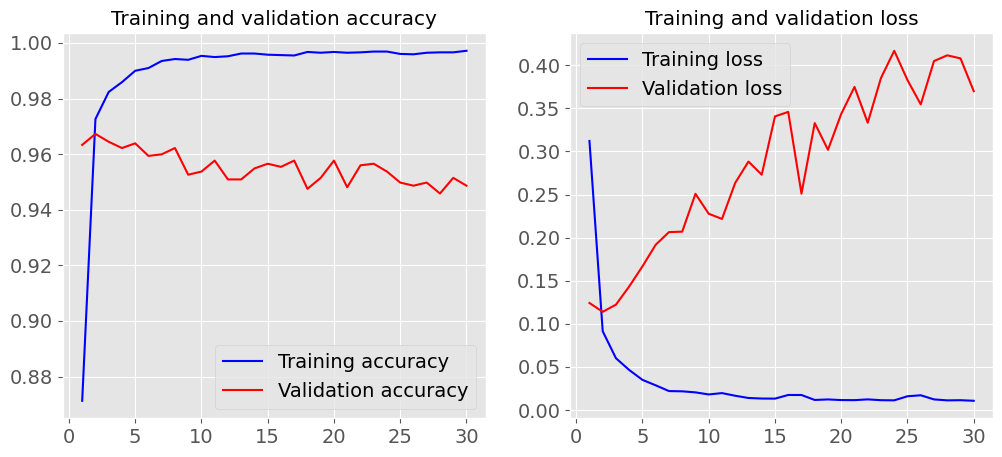

In [17]:
plot_history(history)

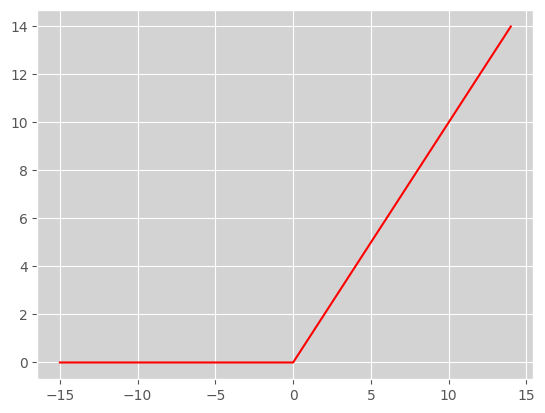

In [18]:
# plot inputs and outputs
from matplotlib import pyplot
 
# rectified linear function
def rectified(x):
 return max(0.0, x)
 
# define a series of inputs
series_in = [x for x in range(-15, 15)]
# calculate outputs for our inputs
series_out = [rectified(x) for x in series_in]
# line plot of raw inputs to rectified outputs
plt.grid(color='white')

# Set the background color to gray
ax = plt.gca()
ax.set_facecolor('lightgray')
pyplot.plot(series_in, series_out, color = "red")
pyplot.show()

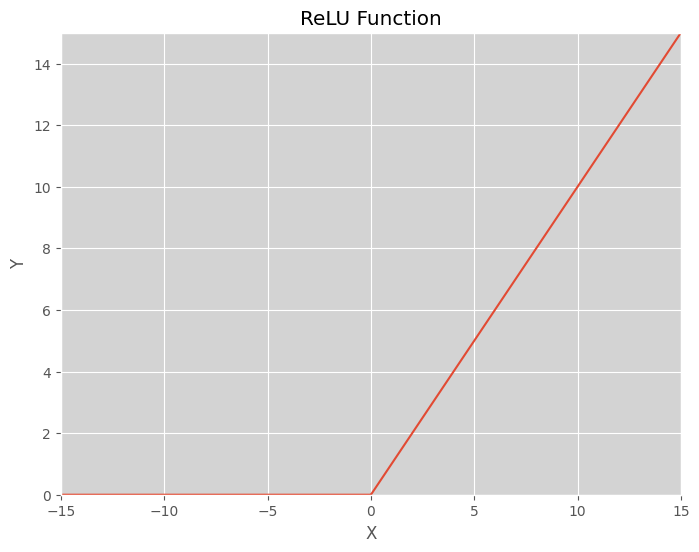

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate x values between -15 and 15
x = np.linspace(-15, 15, 500)

# Generate y values using the ReLU function
y = relu(x)

# Set the plot parameters
plt.figure(figsize=(8, 6))
plt.title("ReLU Function")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(-15, 15)
plt.ylim(0, 15)
plt.grid(color='white')

# Set the background color to gray
ax = plt.gca()
ax.set_facecolor('lightgray')

# Plot the ReLU function
plt.plot(x, y)

# Show the plot
plt.show()


In [20]:
import numpy as np 
def sig(x):
 return 1/(1 + np.exp(-x))

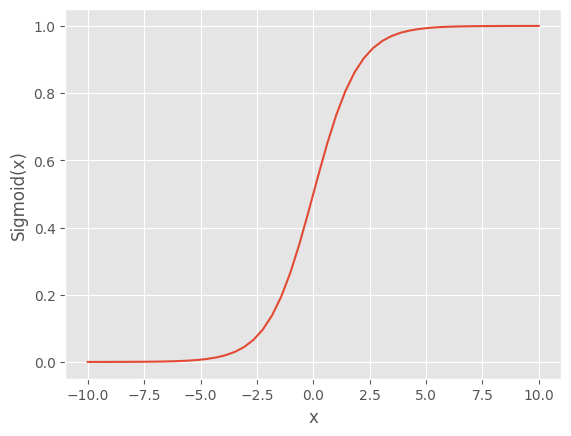

In [21]:
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 50)   
p = sig(x)
plt.xlabel("x") 
plt.ylabel("Sigmoid(x)")  
plt.plot(x, p) 
plt.show()

## 4. Summarize what you have learned and discovered from Task 1-3 as well as the tasks you completed last week.
## Classification Method Comparison

### Naïve Bayes
- **Accuracy**: 0.7951
- **Classification Report**:
   - Precision: 0.93 (non academic), 0.73 (Academic)
   - Recall: 0.63 (non academic), 0.95 (Academic)
   - F1-Score: 0.75 (non academic), 0.82 (Academic)
   - Support: 873 (non academic), 899 (Academic)

### Support Vector Classifier (SVC)
- **Accuracy**: 0.9644
- **Classification Report**:
   - Precision: 0.94 (non academic), 0.99 (Academic)
   - Recall: 0.99 (non academic), 0.94 (Academic)
   - F1-Score: 0.96 (non academic), 0.96 (Academic)
   - Support: 873 (non academic), 899 (Academic)

### Multilayer Perceptron (MLP)
- Model Parameters: 1,001
- Sequential Model Layers: 5
- **Training Accuracy**: 0.9972
- **Testing Accuracy**: 0.9554

In summary, we applied three different classification methods to solve a binary classification problem. Here are the results:

- **Naïve Bayes**: Achieved an accuracy of 0.7951 with precision, recall, and F1-scores for both classes.
- **Support Vector Classifier (SVC)**: Achieved an accuracy of 0.9644 with high precision, recall, and F1-scores for both classes, indicating excellent performance.
- **Multilayer Perceptron (MLP)**: Achieved a training accuracy of 0.9972 and a testing accuracy of 0.9554, showing strong performance on the testing data.

SVC outperforms Naïve Bayes in terms of accuracy, precision, recall, and F1-scores, making it the most accurate model for this classification task. MLP also performs well but has slightly lower accuracy than SVC on the testing data.
